In [1]:
import sys

sys.path.append('./DPT/')
sys.path.append('./MODNet/')
sys.path.append('./background')
sys.path.append('./image_merging')
sys.path

['/Users/rakeshc/workspace/personal/personal_art',
 '/Users/rakeshc/.vscode/extensions/ms-toolsai.jupyter-2021.6.999406279/pythonFiles',
 '/Users/rakeshc/.vscode/extensions/ms-toolsai.jupyter-2021.6.999406279/pythonFiles/lib/python',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python36.zip',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6/lib-dynload',
 '/Users/rakeshc/.pyenv/versions/3.6.9/lib/python3.6',
 '',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6/site-packages',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6/site-packages/IPython/extensions',
 '/Users/rakeshc/.ipython',
 './DPT/',
 './MODNet/',
 './background',
 './image_merging']

In [2]:
import torch
from background import person_detection
import glob
import util.io as io

In [3]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60

In [4]:
img_path = glob.glob(os.path.join('./DPT/input', "*"))[0]
img = io.read_image(img_path)

In [5]:

detector = person_detection.PersonDetection(img)

predicted_mask = detector.detect(model_type='modnet')

Personal detection - initializing
/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6/site-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


array([[1.3112054e-04, 6.7448265e-05, 3.8684598e-06, ..., 1.8074043e-05,
        2.6190316e-04, 5.0543586e-04],
       [7.1044691e-05, 3.6564823e-05, 2.1875067e-06, ..., 9.8496112e-06,
        1.3821982e-04, 2.6644889e-04],
       [1.3327897e-05, 6.9468811e-06, 7.4678780e-07, ..., 2.1490218e-06,
        1.5964830e-05, 2.9840599e-05],
       ...,
       [4.6149460e-05, 2.3237557e-05, 2.9922782e-07, ..., 9.9152631e-01,
        9.8986346e-01, 9.8725247e-01],
       [4.7976107e-04, 2.4356821e-04, 6.0834154e-06, ..., 9.8466933e-01,
        9.7495401e-01, 9.6363145e-01],
       [8.8942796e-04, 4.5187044e-04, 1.1779426e-05, ..., 9.7763318e-01,
        9.6009278e-01, 9.4090408e-01]], dtype=float32)

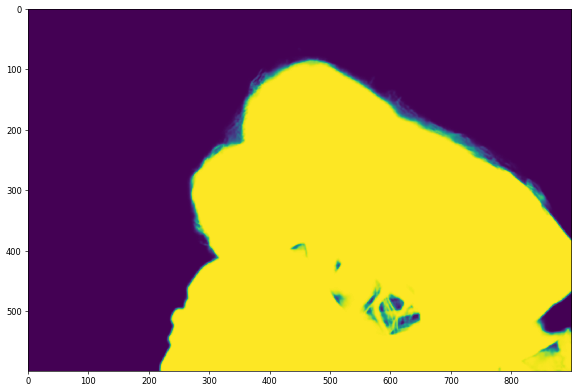

In [6]:


plt.imshow(predicted_mask)
predicted_mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 899.5, 599.5, -0.5)

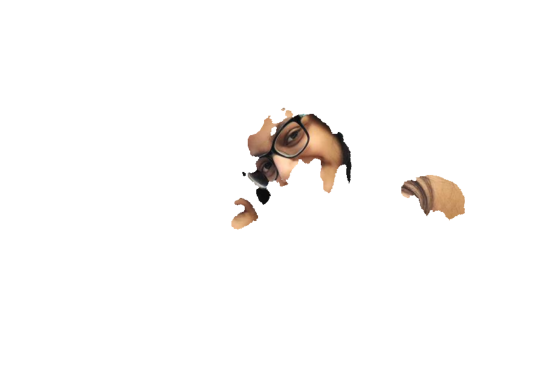

In [7]:
from image_merging import matting

merger = matting.ImageCut(img, predicted_mask)

foreground_people = merger.cut()

plt.imshow(foreground_people)
plt.axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 899.5, 599.5, -0.5)

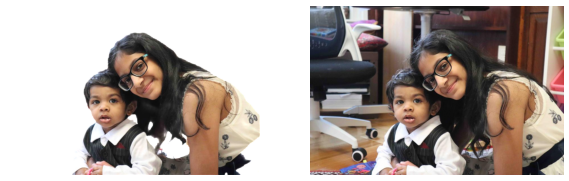

In [8]:
merger = matting.AlphaMatting(img, predicted_mask, None)

foreground_people = merger.cut()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(foreground_people)
ax1.axis('off')

ax2.imshow(img)
ax2.axis('off')